<a href="https://www.kaggle.com/code/nyagami/sentiment-analysis-of-airline-tweets?scriptVersionId=133147575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SENTIMENT ANALYSIS OF TWEETS

# Introduction
Sentiment analysis of tweets task will use tweets sent to six airlines and attempt to identify whether they are positive, negative or neutral. This is a natural language processing and a classification task. 

Sentiment analysis process will try two methods and select one with the most accuracy. 

## About the dataset
The tweets dataset comprises of 13 features including: 
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

# Import libraries and preview dataset

In [1]:
!pip install langdetect
!pip install textatistic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=6266a01064031e3117485380a6260f3a94f19a59e0f611451d0ad8ad94040402
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29067 sha256=d63f1000ae1ead0f38e836556afdb609879a9ed0d12129e87da583e1206fec28
  Stored in directory: /root/.cache/pip/wheels/6e/31/c3/df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=37451 sha256=5ed15411fce1d50e46be77d63f27652cff

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from wordcloud import WordCloud
from textblob import TextBlob
from langdetect import detect_langs
from textatistic import Textatistic
from nltk.tokenize import word_tokenize


from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import xgboost as xgb
from sklearn.impute import SimpleImputer


# Set default settings
sns.set_style('whitegrid')
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-analysis-of-us-airline-twitter-data/Airline-Sentiment-2-w-AA.csv


In [4]:
# Read dataset
tweets_df = pd.read_csv('/kaggle/input/sentiment-analysis-of-us-airline-twitter-data/Airline-Sentiment-2-w-AA.csv', index_col = 'tweet_id')

# View dataset
tweets_df.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,,,,,,,
5.703060e+17,0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
5.703010e+17,1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
5.703010e+17,2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
5.703010e+17,3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
5.703010e+17,4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [5]:
# View dataset features
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14640 entries, 5.70306e+17 to 5.69587e+17
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14640 non-null  int64  
 1   _unit_id                      14640 non-null  int64  
 2   _golden                       14640 non-null  bool   
 3   _unit_state                   14640 non-null  object 
 4   _trusted_judgments            14640 non-null  int64  
 5   _last_judgment_at             14584 non-null  object 
 6   airline_sentiment             14640 non-null  object 
 7   airline_sentiment:confidence  14640 non-null  float64
 8   negativereason                9178 non-null   object 
 9   negativereason:confidence     10522 non-null  float64
 10  airline                       14640 non-null  object 
 11  airline_sentiment_gold        40 non-null     object 
 12  name                          14640 non-nu

In [6]:
# Extracting features that we will use
tweets_df = tweets_df[['text','tweet_created','airline_sentiment']]
tweets_df

,text,tweet_created,airline_sentiment
tweet_id,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2/24/15 11:35,neutral
5.703010e+17,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,positive
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,neutral
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,negative
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,negative
...,...,...,...
5.695880e+17,@AmericanAir thank you we got on a different f...,2/22/15 12:01,positive
5.695870e+17,@AmericanAir leaving over 20 minutes Late Flig...,2/22/15 11:59,negative
5.695870e+17,@AmericanAir Please bring American Airlines to...,2/22/15 11:59,neutral


# Descriptive Analysis
## Duration of tweets
The tweets were sent between 16th Feb 2015 to 24th Feb 2015

In [7]:
tweets_df['tweet_created'] = pd.to_datetime(tweets_df.tweet_created, format = '%m/%d/%y %H:%M')
tweets_df.tweet_created.agg(['min','max'])

min   2015-02-16 23:36:00
max   2015-02-24 11:53:00
Name: tweet_created, dtype: datetime64[ns]

## Polarity of the tweets
The tweets have been pre-classified into different emotions. Among the tweets, 62% are categorized as negative, indicating a predominantly negative sentiment, while 16% are classified as positive, suggesting a smaller proportion of positive sentiments. Additionally, 21% of the tweets are categorized as neutral, representing a neutral emotional tone. These pre-assigned emotion categories will serve as the feature against which we will evaluate the accuracy of our predictions.

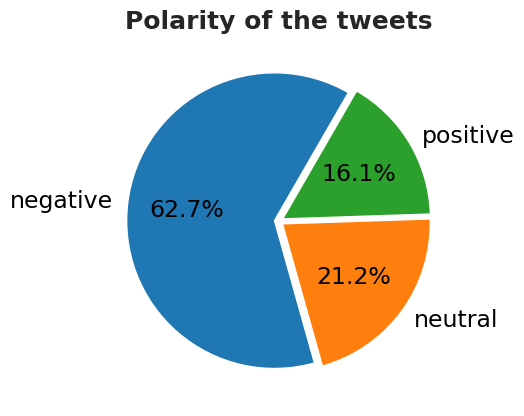

In [8]:
#fig = plt.figure(figsize = (10,6))
tweets_df.airline_sentiment.value_counts().plot(kind = 'pie', label ='', autopct ='%1.1f%%', explode = [0.03,0.03,0.03],textprops = {'fontsize':17, 'color':'k'}, startangle = 60)
plt.title('Polarity of the tweets')
plt.show()

# Preprocessing

## Feature extraction
Creating new features for:
- Number of hashtags
- Number of mentions
- Number of characters
- Number of words

### Number of hashtags in the tweet

In [9]:
# Define the regular expression pattern for hashtags
pattern = r'#[a-zA-Z0-9]+'

# Apply the lambda function to count the number of hashtags in each text
hashtags = tweets_df.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'hashtags' column to the 'X' DataFrame
tweets_df = tweets_df.assign(hashtags=hashtags.values)

tweets_df.head(5)

,text,tweet_created,airline_sentiment,hashtags
tweet_id,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0


### Number of mentions in the tweet

In [10]:
# Define the regular expression pattern for mentions
pattern = r'@[a-zA-Z0-9]+'

# Apply the lambda function to count the number of mentions in each text
mentions = tweets_df.text.apply(lambda x: len(re.findall(pattern, x)))

# Add the 'mentions' column to the 'X' DataFrame
tweets_df = tweets_df.assign(mentions=mentions.values)

tweets_df.head(5)

,text,tweet_created,airline_sentiment,hashtags,mentions
tweet_id,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1


### Number of characters in the tweet

In [11]:
# Apply the lambda function to count the number of characters in each text
no_of_chars = tweets_df.text.apply(lambda x: len(x))

# Add the 'no_of_chars' column to the 'X' DataFrame
tweets_df = tweets_df.assign(no_of_chars=no_of_chars)

tweets_df.head()

,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars
tweet_id,,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2,35
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1,72
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1,71
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1,126
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1,55


### Number of words in the tweet

In [12]:
# Tokenize the text in each tweet to generate a list of tokens
tokens = [word_tokenize(tweet) for tweet in tweets_df.text]

# Count the number of alphanumeric tokens in each tokenized tweet
words = [len([token for token in sent if token.isalnum()]) for sent in tokens]

# Add the 'no_of_words' column to the 'X' DataFrame
tweets_df = tweets_df.assign(no_of_words=words)

tweets_df.head()

,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,,,,
5.703060e+17,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:00,neutral,0,2,35,4
5.703010e+17,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:00,positive,0,1,72,9
5.703010e+17,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:00,neutral,0,1,71,12
5.703010e+17,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:00,negative,0,1,126,17
5.703010e+17,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:00,negative,0,1,55,10


## Extracting the airline name
We have tweets to six major airlines. 

In [13]:
# Identify text starting with the @ sign
pattern = r'@[a-zA-Z0-9]+'
tweets_df['airline_extracted'] = tweets_df.text.apply(lambda x: re.findall(pattern, x))

# Extract the name of the airline
tweets_df['airline_extracted'] = [item[0].lower() for item in tweets_df.airline_extracted]

# Remove the '@' sign from the name
tweets_df['airline_extracted'] = tweets_df['airline_extracted'].apply(lambda x: re.sub("@", '',str(x)))

tweets_df['airline_extracted'].value_counts()

united             3817
usairways          2905
americanair        2754
southwestair       2417
jetblue            2215
virginamerica       504
deltaassist           2
nrhodes85             2
ods1819               1
chasefoster           1
sb5551                1
albertbreer           1
djevolutionhd         1
andrewfallis          1
sarahpompei           1
timbennettg3          1
malhoit               1
scm1133               1
ninadavuluri          1
shannonwoodward       1
nytimes               1
eatgregeat            1
catfoodbeerglue       1
hillaconlin           1
internjohnradio       1
kciairport            1
imaginedragons        1
dadboner              1
melissaafrancis       1
mandarinjourney       1
lindaswc              1
vanessaannz           1
Name: airline_extracted, dtype: int64

### Cleaning airlines
We will remove tweets not addressed to the six airlines.

In [14]:
# Get the list of unique airlines in the 'airline' column of the 'X' DataFrame
not_airline = tweets_df['airline_extracted'].value_counts().index.tolist()

# Iterate over a list of specific airlines to remove them from the 'not_airline' list
for airline in ['united', 'usairways', 'americanair', 'southwestair', 'jetblue', 'virginamerica']:
    not_airline.remove(airline)


In [15]:
# Shape before
print('Number of rows before =',tweets_df.shape[0])

# Set the 'airline' values to NaN for rows where the 'airline' is in the 'not_airline' list
tweets_df.loc[tweets_df['airline_extracted'].isin(not_airline), 'airline_extracted'] = np.nan

# Drop rows with missing values in the 'airline' column
tweets_df.dropna(subset=['airline_extracted'], inplace=True)

# Shape after
print('Number of rows after =',tweets_df.shape[0])

Number of rows before = 14640
Number of rows after = 14612


# Tokenization/lemmatization

In [16]:
nlp = spacy.load('en_core_web_lg')

In [17]:
# Define the function for tokenization and lemmatization
def spacy_token(text):
    # Process the text using Spacy
    doc = nlp(text)
    # Extract the lemmatized tokens
    tokens = [token.lemma_ for token in doc]
    # Return the list of lemmatized tokens
    return tokens

In [18]:
# Apply the spacy_token function to the tweets column
text_tokens = tweets_df.text.apply(spacy_token)
text_tokens

tweet_id
5.703060e+17            [@VirginAmerica, what, @dhepburn, say, .]
5.703010e+17    [@VirginAmerica, plus, you, 've, add, commerci...
5.703010e+17    [@virginamerica, I, do, not, today, ..., must,...
5.703010e+17    [@VirginAmerica, it, be, really, aggressive, t...
5.703010e+17    [@VirginAmerica, and, it, be, a, really, big, ...
                                      ...                        
5.695880e+17    [@americanair, thank, you, we, get, on, a, dif...
5.695870e+17    [@americanair, leave, over, 20, minute, Late, ...
5.695870e+17    [@americanair, please, bring, American, Airlin...
5.695870e+17    [@americanair, you, have, my, money, ,, you, c...
5.695870e+17    [@americanair, we, have, 8, ppl, so, we, need,...
Name: text, Length: 14612, dtype: object

## Removing punctuations

In [19]:
# Iterate over each row in the text_tokens DataFrame
for i in range(len(text_tokens)):
    # Remove punctuation from each token in the current row
    text_no_punct = [token for token in text_tokens.iloc[i] if token.isalnum()]
    # Update the current row in the text_tokens DataFrame with the modified tokens
    text_tokens.iloc[i] = text_no_punct

text_tokens

tweet_id
5.703060e+17                                          [what, say]
5.703010e+17    [plus, you, add, commercial, to, the, experien...
5.703010e+17    [I, do, not, today, must, mean, I, need, to, t...
5.703010e+17    [it, be, really, aggressive, to, blast, obnoxi...
5.703010e+17    [and, it, be, a, really, big, bad, thing, abou...
                                      ...                        
5.695880e+17    [thank, you, we, get, on, a, different, flight...
5.695870e+17    [leave, over, 20, minute, Late, Flight, no, wa...
5.695870e+17    [please, bring, American, Airlines, to, blackb...
5.695870e+17    [you, have, my, money, you, change, my, flight...
5.695870e+17    [we, have, 8, ppl, so, we, need, 2, know, how,...
Name: text, Length: 14612, dtype: object

## Removing stopwords

In [20]:
# Load stop words from spacy module
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [21]:
# Iterate over each row in the text_tokens Series
for i in range(len(text_tokens)):
    # Convert each token to lowercase and remove stopwords
    tokens = [token.lower() for token in text_tokens.iloc[i] if token.lower() not in stopwords]
    # Join the processed tokens back into a string
    tokens_joined = " ".join(tokens)
    # Update the current row in the text_tokens DataFrame with the joined tokens
    text_tokens.iloc[i] = tokens_joined

In [22]:
tweets_df.text = text_tokens
tweets_df

,text,tweet_created,airline_sentiment,hashtags,mentions,no_of_chars,no_of_words,airline_extracted
tweet_id,,,,,,,,
5.703060e+17,,2015-02-24 11:35:00,neutral,0,2,35,4,virginamerica
5.703010e+17,plus add commercial experience tacky,2015-02-24 11:15:00,positive,0,1,72,9,virginamerica
5.703010e+17,today mean need trip,2015-02-24 11:15:00,neutral,0,1,71,12,virginamerica
5.703010e+17,aggressive blast obnoxious entertainment guest...,2015-02-24 11:15:00,negative,0,1,126,17,virginamerica
5.703010e+17,big bad thing,2015-02-24 11:14:00,negative,0,1,55,10,virginamerica
...,...,...,...,...,...,...,...,...
5.695880e+17,thank different flight chicago,2015-02-22 12:01:00,positive,0,1,63,11,americanair
5.695870e+17,leave 20 minute late flight warning communicat...,2015-02-22 11:59:00,negative,0,1,150,23,americanair
5.695870e+17,bring american airlines blackberry10,2015-02-22 11:59:00,neutral,1,1,60,7,americanair


# Exploratory Data Analysis
## Word cloud
To generate our wordcloud, we will join all the texts from the tweets. We will update our stopwords to include obvious words common in airports like flight, fly, plane, airport, airline e.t.c.

The word cloud generated has words such as "Thank," "time," "help," "delay," and "cancel" appearing often, which reveals the prevalent themes and sentiments in these tweets. The prominence of "Thank" suggests a high frequency of gratitude and appreciation expressed towards the airlines. The word "time" indicates a focus on flight schedules and punctuality. "Help" indicates a recurring theme of seeking assistance or support. The larger size of "delay" and "cancel" signifies that flight disruptions are commonly discussed. 

In [23]:
text = ''
for i in range(len(text_tokens)):
    text = text + " " + text_tokens.iloc[i]

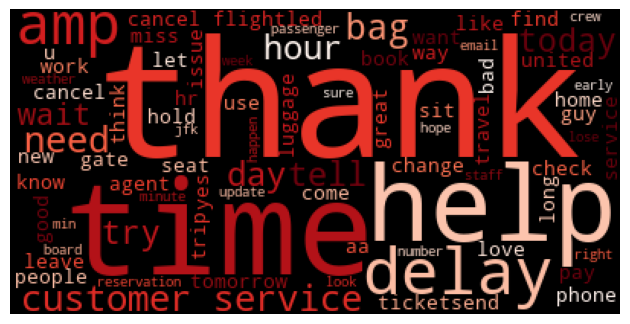

In [24]:
#fig = plt.figure(figsize = (14,10))
cloud = WordCloud(background_color = 'black', colormap = 'Reds', min_font_size =7, stopwords = ['flight', 'fly','plane','airport','airline', 'flightle']).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

## Visualizing sample tweets
We will visualize sample tweets with the words thank, time, delay, cancel, help, customer and service
### Thank
A sample of 5 tweets with the word `thank` has tweets that sound positive and appreciative

In [25]:
sample = []
for tweet in tweets_df.text.values:
    if 'thank' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['forget reservation thank great leadership company cancel flight flight thank',
 'thank',
 'thank good rebooke agent phone amp addtl resolution dm appreciated',
 'thank fill claim hope bag tomorrow',
 'thank flight leave 2 arrive airport early wedding vt grateful fly btv']

### Time
A sample of five tweets with the word `time` has majority complaining.

In [26]:
sample = []
for tweet in tweets_df.text.values:
    if 'time' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['departure time late flightr lucky home 3',
 'think 2 week waiting time contact lose customer',
 'wait line time tell crewmember update 3hrdelay disappoint',
 'grade trip flight timeliness cancel flightations customer service flight attendant',
 'ok 4th try today 138 minute hold time terrible']

### Delay
These are tweets about customers talking about delays by the airline.

In [27]:
sample = []
for tweet in tweets_df.text.values:
    if 'delay' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['reason delay',
 'listen delay message phone delay message come shit',
 'compensate delay cancel flightlation',
 '3 cancel flightlations delay cause miss connect flight night home thank pathetic',
 'flight plan delay tuesday computer crash']

### Cancel

In [28]:
sample = []
for tweet in tweets_df.text.values:
    if 'cancel' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['accord dca recover nicely yesterday snow cancel flightling flight',
 'good talk agent reschedule cancel flighted flight answer aa know busy need help thank',
 'cancel flight flight',
 'miami phl flight cancel flightled gate aa phone awful awful awful',
 'thank help reflight booking problem cancel flightedflight yvonne anthony help tel aviv time happyfriday']

### Help
These are tweets about customers seeking help.

In [29]:
sample = []
for tweet in tweets_df.text.values:
    if 'help' in tweet:
        sample.append(tweet)
random.seed(987)
random.sample(sample, 5)

['change entire flight plan vacation day night early stay help',
 '3 day late flightr bag leave iad united help tell different story',
 'group cancel flightlation fee waive ticket book rep help',
 'help hold 3 hrs amp client want ff nbr record elite waa',
 'try change flight online error help dm']

## Airlines
The bar chart shows the count of tweets directed to different airlines. United Airlines received the highest number of tweets with 3,817, suggesting a significant level of engagement and interaction on Twitter. US Airways and American Airlines followed closely with 2,905 and 2,754 tweets respectively. Southwest Airlines and JetBlue received 2,417 and 2,215 tweets respectively. tweets_df America had the lowest number of tweets with 504, suggesting relatively fewer mentions or interactions compared to other airlines. 

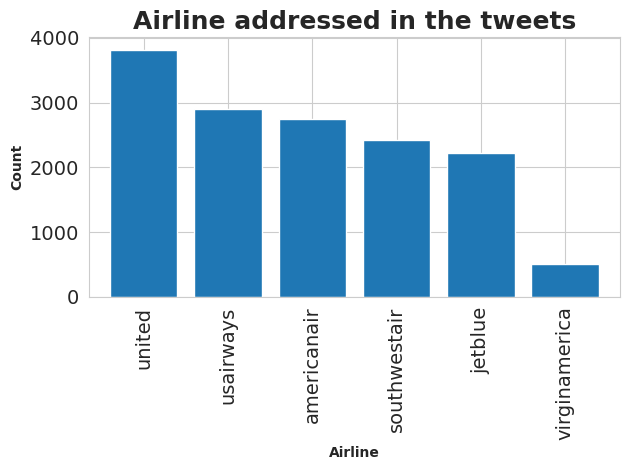

In [30]:
# Create a new figure with a specific size
#fig = plt.figure(figsize=(8, 6))

# Generate a bar plot of the airline counts
tweets_df.airline_extracted.value_counts().plot(kind='bar', width=0.8)

# Set the plot labels
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline addressed in the tweets')

# Adjust the layout of the plot to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


# Sentiment Analysis using lexicon method

In [31]:
def lexicon_sentiment(df):
    """ Calculates the sentiment of text data in a DataFrame using the TextBlob library."""
    
    sentiment = []  # List to store the predicted sentiment labels
    sentiment_score = df.text.apply(lambda x: TextBlob(x).sentiment[0])  # Calculate sentiment scores using TextBlob
    
    # Iterate over each sentiment score and assign sentiment labels based on thresholds
    for score in sentiment_score:
        if score < -0.1:
            sentiment.append('negative')
        elif score > 0.1:
            sentiment.append('positive')
        else:
            sentiment.append('neutral')
    
    df['predicted_sentiment'] = sentiment  # Add the 'predicted_sentiment' column to the DataFrame

# Apply the function on tweets to determine sentiment
lexicon_sentiment(tweets_df)

## Conclusion of sentiment analysis using lexicon method
The sentiment classification predictions can be summarized as follows: only 24% of the tweets were correctly predicted as negative sentiment, while 55% were incorrectly classified as neutral and 20% as positive. For the neutral sentiment class, 69% of the tweets were correctly predicted, with 5% misclassified as negative and 24% as positive. Additionally, 57% of the tweets were correctly predicted as positive sentiment, but 3% were misclassified as negative and 39% as neutral. 

This method is not very accurate in predicting the sentiment of tweets with an overall accuracy of 40%.

In [32]:
# Perform crosstabs
display(pd.crosstab(tweets_df['airline_sentiment'], tweets_df['predicted_sentiment'], normalize = 'index'))

predicted_sentiment,negative,neutral,positive
airline_sentiment,,,
negative,0.250709,0.551408,0.197883
neutral,0.057910,0.699450,0.242640
positive,0.033913,0.387028,0.579059


In [33]:
print(classification_report(tweets_df['airline_sentiment'], tweets_df['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.90      0.25      0.39      9162
     neutral       0.27      0.70      0.39      3091
    positive       0.35      0.58      0.43      2359

    accuracy                           0.40     14612
   macro avg       0.50      0.51      0.40     14612
weighted avg       0.68      0.40      0.40     14612



In [34]:
accuracy = (np.sum(tweets_df['airline_sentiment'] == tweets_df['predicted_sentiment']))/len(tweets_df['airline_sentiment'])
print(accuracy)

0.39864494935669315


# Preprocessing II
## Selecting data types

In [35]:
# Define a list of column names representing numeric features
columns_num = tweets_df.select_dtypes(include = ['int','float']).columns
columns_cat = ['airline_extracted']

# Create y and convert it to numeric
y = tweets_df.airline_sentiment 
y = y.replace({'negative':1, 'neutral':0, 'positive':2})
y

tweet_id
5.703060e+17    0
5.703010e+17    2
5.703010e+17    0
5.703010e+17    1
5.703010e+17    1
               ..
5.695880e+17    2
5.695870e+17    1
5.695870e+17    0
5.695870e+17    1
5.695870e+17    0
Name: airline_sentiment, Length: 14612, dtype: int64

In [36]:
# Split to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(tweets_df, y, random_state = 987, stratify = y)

## Standardize numeric columns

In [37]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train[columns_num] = scaler.fit_transform(X_train[columns_num])

# Transform the test data using the fitted scaler
X_test[columns_num] = scaler.transform(X_test[columns_num])
X_train[columns_num]

,hashtags,mentions,no_of_chars,no_of_words
tweet_id,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647
5.678180e+17,0.0,0.0,0.410138,0.500000
5.686760e+17,0.0,0.0,0.663594,0.676471
5.699240e+17,0.0,0.2,0.345622,0.264706
5.696230e+17,0.0,0.0,0.322581,0.411765
...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.558824
5.688390e+17,0.0,0.0,0.350230,0.323529
5.678130e+17,0.0,0.0,0.465438,0.500000


## Encode categorical columns

In [38]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical column in the training data and transform it
X_train_encoded = encoder.fit_transform(X_train[columns_cat])

# Transform the categorical column in the test data
X_test_encoded = encoder.transform(X_test[columns_cat])

# Drop the column from the dataset
X_test.drop(columns_cat, axis = 1)
X_train.drop(columns_cat, axis = 1)

# Convert encoded data to dataframe
X_train_airline = pd.DataFrame(X_train_encoded.toarray(), columns = encoder.get_feature_names_out(), index = X_train.index)
X_test_airline = pd.DataFrame(X_test_encoded.toarray(), columns = encoder.get_feature_names_out(), index = X_test.index)
X_train_airline

,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,
5.703080e+17,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5.702740e+17,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.0,0.0,0.0,1.0


## Impute missing values in the tweets column

In [39]:
imputer = SimpleImputer(missing_values = '', strategy = 'constant', fill_value = 'missing')

In [40]:
X_train[['text']] = imputer.fit_transform(X_train[['text']])
X_test[['text']] = imputer.transform(X_test[['text']])
X_train['text']

tweet_id
5.703080e+17    receive horrible service treat poorly richard ...
5.678180e+17    know hard predict flight dallas nashville tomo...
5.686760e+17    airline system inform client flight cancel fli...
5.699240e+17                          fleet fleek new fav airline
5.696230e+17                     want speak human obscene request
                                      ...                        
5.702740e+17    aww thanks aa dfw gma understand btw airline m...
5.688390e+17            sea den south sound volleyball team way m
5.678130e+17                   use passbook love use email future
5.696680e+17                     fly 763s madrid jfk dfw ord huge
5.702910e+17               lose voucher miami aeroport jan 26 use
Name: text, Length: 10959, dtype: object

# Sentiment Analysis using ML with Count Vectorizer
## Vectorization

In [41]:
vectorizer = CountVectorizer()

# Vectorization
X_train_vect = vectorizer.fit_transform(X_train.text).toarray()
X_test_vect = vectorizer.transform(X_test.text).toarray()

# Converting to dataframe
X_train_vect_df = pd.DataFrame(X_train_vect, columns = vectorizer.get_feature_names_out(), index = X_train.index)
X_test_vect_df = pd.DataFrame(X_test_vect, columns = vectorizer.get_feature_names_out(), index = X_test.index)
X_train_vect_df

,000114,000419,0011,0016,0162389030167,0162431184663,0185,03,0316,0400,...,ùªä,ùªî,ùªö,ùô,ùôà,ùôî,ùôû,ùôü,ùõ,ùõª
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.678180e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.686760e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.699240e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.696230e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.688390e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.678130e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging all the dataframes

In [42]:
X_train_final = pd.concat([X_train[columns_num],  X_train_vect_df, X_train_airline], axis =1)
X_test_final = pd.concat([X_test[columns_num],  X_test_vect_df, X_test_airline], axis =1)
X_train_final

,hashtags,mentions,no_of_chars,no_of_words,000114,000419,0011,0016,0162389030167,0162431184663,...,ùôû,ùôü,ùõ,ùõª,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,0.410138,0.500000,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,0.0,0.663594,0.676471,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,0.2,0.345622,0.264706,0,0,0,0,0,0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,0.0,0.0,0.322581,0.411765,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.558824,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,0.350230,0.323529,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.465438,0.500000,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## Model training and evaluation

In [43]:
classifiers = [
    #('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    #('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('xgboost',xgb.XGBClassifier())
]

In [44]:
# Iterate through the classifiers
for clf_name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train_final, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_final)
    
    # Calculate the accuracy score
    accuracy = (np.sum(y_test == y_pred))/len(y_test)
    
    # Print the accuracy for each classifier
    print(f"{clf_name}: Accuracy = {accuracy}")


Decision Tree: Accuracy = 0.6942239255406515
Random Forest: Accuracy = 0.7454147276211334
K-Nearest Neighbors: Accuracy = 0.6359156857377498
Gradient Boosting: Accuracy = 0.7514371749247194
Naive Bayes: Accuracy = 0.43525869148644947
xgboost: Accuracy = 0.7695045168354777


# Sentiment Analysis using ML with TFIDF
## Vectorization

In [45]:
tfidf = TfidfVectorizer()

# Vectorization
X_train_vect = tfidf.fit_transform(X_train.text).toarray()
X_test_vect = tfidf.transform(X_test.text).toarray()

# Converting to dataframe
X_train_vect_df = pd.DataFrame(X_train_vect, columns = tfidf.get_feature_names_out(), index = X_train.index)
X_test_vect_df = pd.DataFrame(X_test_vect, columns = tfidf.get_feature_names_out(), index = X_test.index)
X_train_vect_df

,000114,000419,0011,0016,0162389030167,0162431184663,0185,03,0316,0400,...,ùªä,ùªî,ùªö,ùô,ùôà,ùôî,ùôû,ùôü,ùõ,ùõª
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.678180e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.686760e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.696230e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merging all the dataframes

In [46]:
X_train_final = pd.concat([X_train[columns_num],  X_train_vect_df, X_train_airline], axis =1)
X_test_final = pd.concat([X_test[columns_num],  X_test_vect_df, X_test_airline], axis =1)
X_train_final

,hashtags,mentions,no_of_chars,no_of_words,000114,000419,0011,0016,0162389030167,0162431184663,...,ùôû,ùôü,ùõ,ùõª,airline_extracted_americanair,airline_extracted_jetblue,airline_extracted_southwestair,airline_extracted_united,airline_extracted_usairways,airline_extracted_virginamerica
tweet_id,,,,,,,,,,,,,,,,,,,,,
5.703080e+17,0.0,0.0,0.599078,0.617647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5.678180e+17,0.0,0.0,0.410138,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5.686760e+17,0.0,0.0,0.663594,0.676471,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5.699240e+17,0.0,0.2,0.345622,0.264706,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5.696230e+17,0.0,0.0,0.322581,0.411765,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.702740e+17,0.0,0.0,0.576037,0.558824,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5.688390e+17,0.0,0.0,0.350230,0.323529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5.678130e+17,0.0,0.0,0.465438,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model training and evaluation

In [47]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('xgboost',xgb.XGBClassifier())
]

In [48]:
# Iterate through the classifiers
for clf_name, clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train_final, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_final)
    
    # Calculate the accuracy score
    accuracy = (np.sum(y_test ==y_pred))/len(y_test)
    
    # Print the accuracy for each classifier
    print(f"{clf_name}: Accuracy = {accuracy}")


Decision Tree: Accuracy = 0.6734191075828087
Random Forest: Accuracy = 0.7462359704352587
K-Nearest Neighbors: Accuracy = 0.7155762387079113
Gradient Boosting: Accuracy = 0.7486996988776348
Naive Bayes: Accuracy = 0.4377224199288256
xgboost: Accuracy = 0.7692307692307693


# Conclusion
Employing the machine learning approach for sentiment analysis proves to be advantageous, yielding an accuracy exceeding 74% when utilizing random forests, gradient boosting or xgboost algorithms. Further enhancements to this accuracy can be achieved through hyperparameter tuning and the selection of features with greater variance.